# Objectif : comprendre le compromis biais-variance

<a href="https://xkcd.com/1725/"><img src="img/linear_regression xkcd.png"/></a>

#  Concept et modélisation

## Motivations

En Machine Learning, un compromis existe entre la volonté de reproduire avec précision les régularités des données d'apprentissage et le souhait de généraliser au-delà de l'échantillon d'apprentissage pour que le modèle traite efficacement d'autres données (les données de test).

Ce problème central en apprentissage supervisé s'applique aussi bien aux problèmes de classification qu'aux problèmes de régression. Nommé *compromis biais-variance*, il traduit en fait le lien entre deux sources d'erreurs : le biais et la variance. 

- L'**erreur de biais** représente l'erreur entre la prédiction attendue de notre modèle et la valeur exacte que nous tentons de prédire. 

- L'**erreur de variance** représente la variabilité de la prédiction pour un point donné entre plusieurs réalisations.
 
Plus les données d'apprentissage sont reproduites par le modèle avec précision plus le biais est faible, mais l'on risque de reproduire le bruit lié au jeu de données : on fait alors du sur-apprentissage. À l'inverse, généraliser de façon excessive diminue la variance du modèle mais augmente l'erreur de représentation des données d'apprentissage : on parle alors de sous-apprentissage.

Comprendre le *compromis biais-variance* peut aider à mieux interpréter les résultats de nos modèles de prédiction, améliorer les divers paramètres des algorithmes d'apprentissage et éviter les problèmes de sur- et sous-apprentissage.



## Définition mathématique : décomposition de l'erreur quadratique

Soit un échantillon d'apprentissage constitué d'un ensemble de points $X=(x_1,..., x_n)$ et les valeurs réelles associées $Y=(y_1,...,y_n)$ que l'on cherche à prédire. On peut supposer que nos données suivent un modèle statistique de la forme :
$$ Y = f(X) + \epsilon $$
où $\epsilon$ représente un terme d'erreur suivant une loi normale : $\epsilon \sim \mathcal{N}(0,\sigma_\epsilon)$

Un modèle $\hat{f}$ de $f$ peut alors être estimé grâce à un algorithme d'apprentissage supervisé. Dans notre cas, l'erreur quadratique de prédiction pour un échantillon $x$ est :
$$Err(x) = E\left[(y - \hat{f}(x))^2\right]$$

En développant l'expression (remplaçant $y$ par $f(x)+\epsilon$), on peut alors décomposer cette erreur, que l'on souhaite minimiser, en plusieurs composantes :
$$ Err(x) = \underbrace{\left( E[ \hat{f}(x)] - f(x) \right)}_{\text{biais}}~^2 + \underbrace{E\left[\left(\hat{f}(x) - E[\hat{f}(x)]\right)^2\right]}_{\text{variance}} + \underbrace{\sigma_\epsilon^2}_{\text{erreur irréductible}} $$ 
Soit, en résumé :
$$ Err(x) = Biais(\hat{f})^2 + Variance(\hat{f}) + Err_{\text{irréductible}} $$

Le premier terme, le *biais* au carré, mesure l'ampleur de la différence entre la moyenne des prédictions obtenues avec l'ensemble des données et la valeur souhaitée de la fonction $f$. Le second terme, la *variance*, mesure à quel point les solutions obtenues à partir de jeux de données distincts varient autour de leur moyenne, et par conséquent dans quelle mesure la fonction de prédiction $\hat{f}$ est sensible aux données d'apprentissage. Le dernier terme, l'erreur irréductible, correspond au bruit intrinsèque des données d'apprentissage : celui-ci ne peut être réduit contrairement au biais et à la variance.

Avec un modèle parfait, on pourrait annuler le biais et la variance simultanément. La perfection des modèles étant plutôt utopique dans la réalité, cette décomposition met en évidence le *compromis biais-variance* (lié à la complexité des modèles) que l'on doit réaliser. Un modèle de $\hat{f}$ complexe présentera un faible biais mais la flexibilité qu'il entraîne implique souvent une forte variance. A l'inverse un modèle rigide possèdera souvent un fort biais et une faible variance. Les contributions respectives du biais et de la variance sur l'erreur totale peuvent être représentées suivant une courbe en "baignoire":

<img src="img/biasvariance.png"/>

Le modèle « optimal » de prédiction est alors le modèle qui présente le meilleur *compromis biais-variance*.
Les différents paramètres des modèles utilisés en apprentissage supervisé vont permettre d'agir sur l'une ou l'autre des sources d'erreur. C'est alors à l'auteur de faire varier ces paramètres pour trouver le meilleur compromis entre fidélité aux données et généralisation.

Pour agir sur l'erreur d'apprentissage, on peut :
- jouer sur les paramètres internes du modèle ;
- agir sur les données d'apprentissage.

Commençons par quelques `import`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors, svm, datasets
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

# Un premier exemple : régression polynômiale

Pour une première approche du **compromis biais-variance**, nous allons chercher à approximer la fonction $f : x\mapsto\sin(2\pi x)+\sin(5\pi (x+0.5))$ par des polynômes de différents degrés.

La fonction `genSample` genère un échantillon de $n$ points bruités autour de la fonction $f$. La fonction `plotFunction` affiche la fonction de référence (elle admet un paramètre de couleur optionnel), et `plotPoly` affiche le polynôme passé en argument.

In [2]:
def f(X):
    return np.sin(2*np.pi*X)+np.sin(5*np.pi*(X+0.5))

def genSample(n):
    """ Génère un échantillon aléatoire de taille n """
    X = np.linspace(0, 1, n)
    Y = f(X) + np.random.randn(n)/3
    return X, Y

def plotFunction(color="blue"):
    """ Trace la fonction f """
    N = 100
    X = np.linspace(0, 1, N+1)
    Y = f(X)
    plt.plot(X, Y, c=color, label="fonction f")
    return

def plotPoly(p, color="orange"):
    """ Trace le polynôme p """
    N = 100
    X = np.linspace(0, 1, N+1)
    Y = np.polyval(p, X)
    plt.plot(X, Y, c=color, label="polynôme")
    return

<div class="alert alert-warning">
**Consigne :** Dans un premier temps, complétez le code ci-dessous afin de déterminer et afficher le polynôme de degré 5 approximant au mieux l'échantillon généré (*cf* aide de **numpy**).</div>

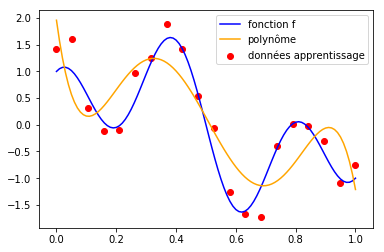

In [3]:
X, Y = genSample(20)
plt.scatter(X, Y, c="red", label="données apprentissage")
plotFunction()

p = np.polyfit(X, Y, 5)
plotPoly(p)

_=plt.legend()

<div class="alert alert-warning">
**Consigne :** Ensuite, complétez les fonctions suivantes :
<ul>
    <li/> `genPolys` : génère $N$ polynômes de degré $d$ approximant $N$ échantillons de taille $n$ ;
    <li/> `plotMeanPolys` : trace la moyenne des polynômes donnés en arguments.
</ul>
</div>

In [4]:
def genPolys(N, d, n):
    """ Génère N polynômes de degré d approximant N échantillons de taille n """
    polys = list()
    for _ in range(N):
        X, Y = genSample(n)
        polys.append(np.polyfit(X, Y, d))
    return polys

def plotMeanPolys(polys, color="red"):
    """ Trace la moyenne des polynômes polys """
    N = 100
    X = np.linspace(0, 1, N)
    Y = np.polyval(sum(polys)/len(polys), X)
    plt.plot(X, Y, c=color, label="polynôme moyen")
    return

<div class="alert alert-warning">
**Consigne :** Maintenant que les fonctions nécessaires sont disponibles, nous allons mettre en évidence le *compromis biais-variance* par le biais (!) du degré du polynôme de régression. Pour cela, nous prendrons $n = 20$ la taille des échantillons, et $N = 100$ le nombre d'échantillons. Pour chaque degré $d$ entre 5 et 12 :
<ul>
    <li/>générez $N$ échantillons de taille $n$ ;
    <li/>approximez-les par $N$ polynômes de degré $d$ ;
    <li/>tracez en quelques-uns (par exemple 10) sur une figure ;
    <li/>tracez la fonction $f$ et le polynôme moyen obtenu sur une autre figure.
</ul>
<br/>
Enfin, tracez le logarithme (pour obtenir un graphe lisible) du biais et de la variance en fonction du degré des polynômes de régression.
<br/>
(si cela semble vous prendre plus d'une quinzaine de minutes, jetez un œil à la correction ;-) )
</div>

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


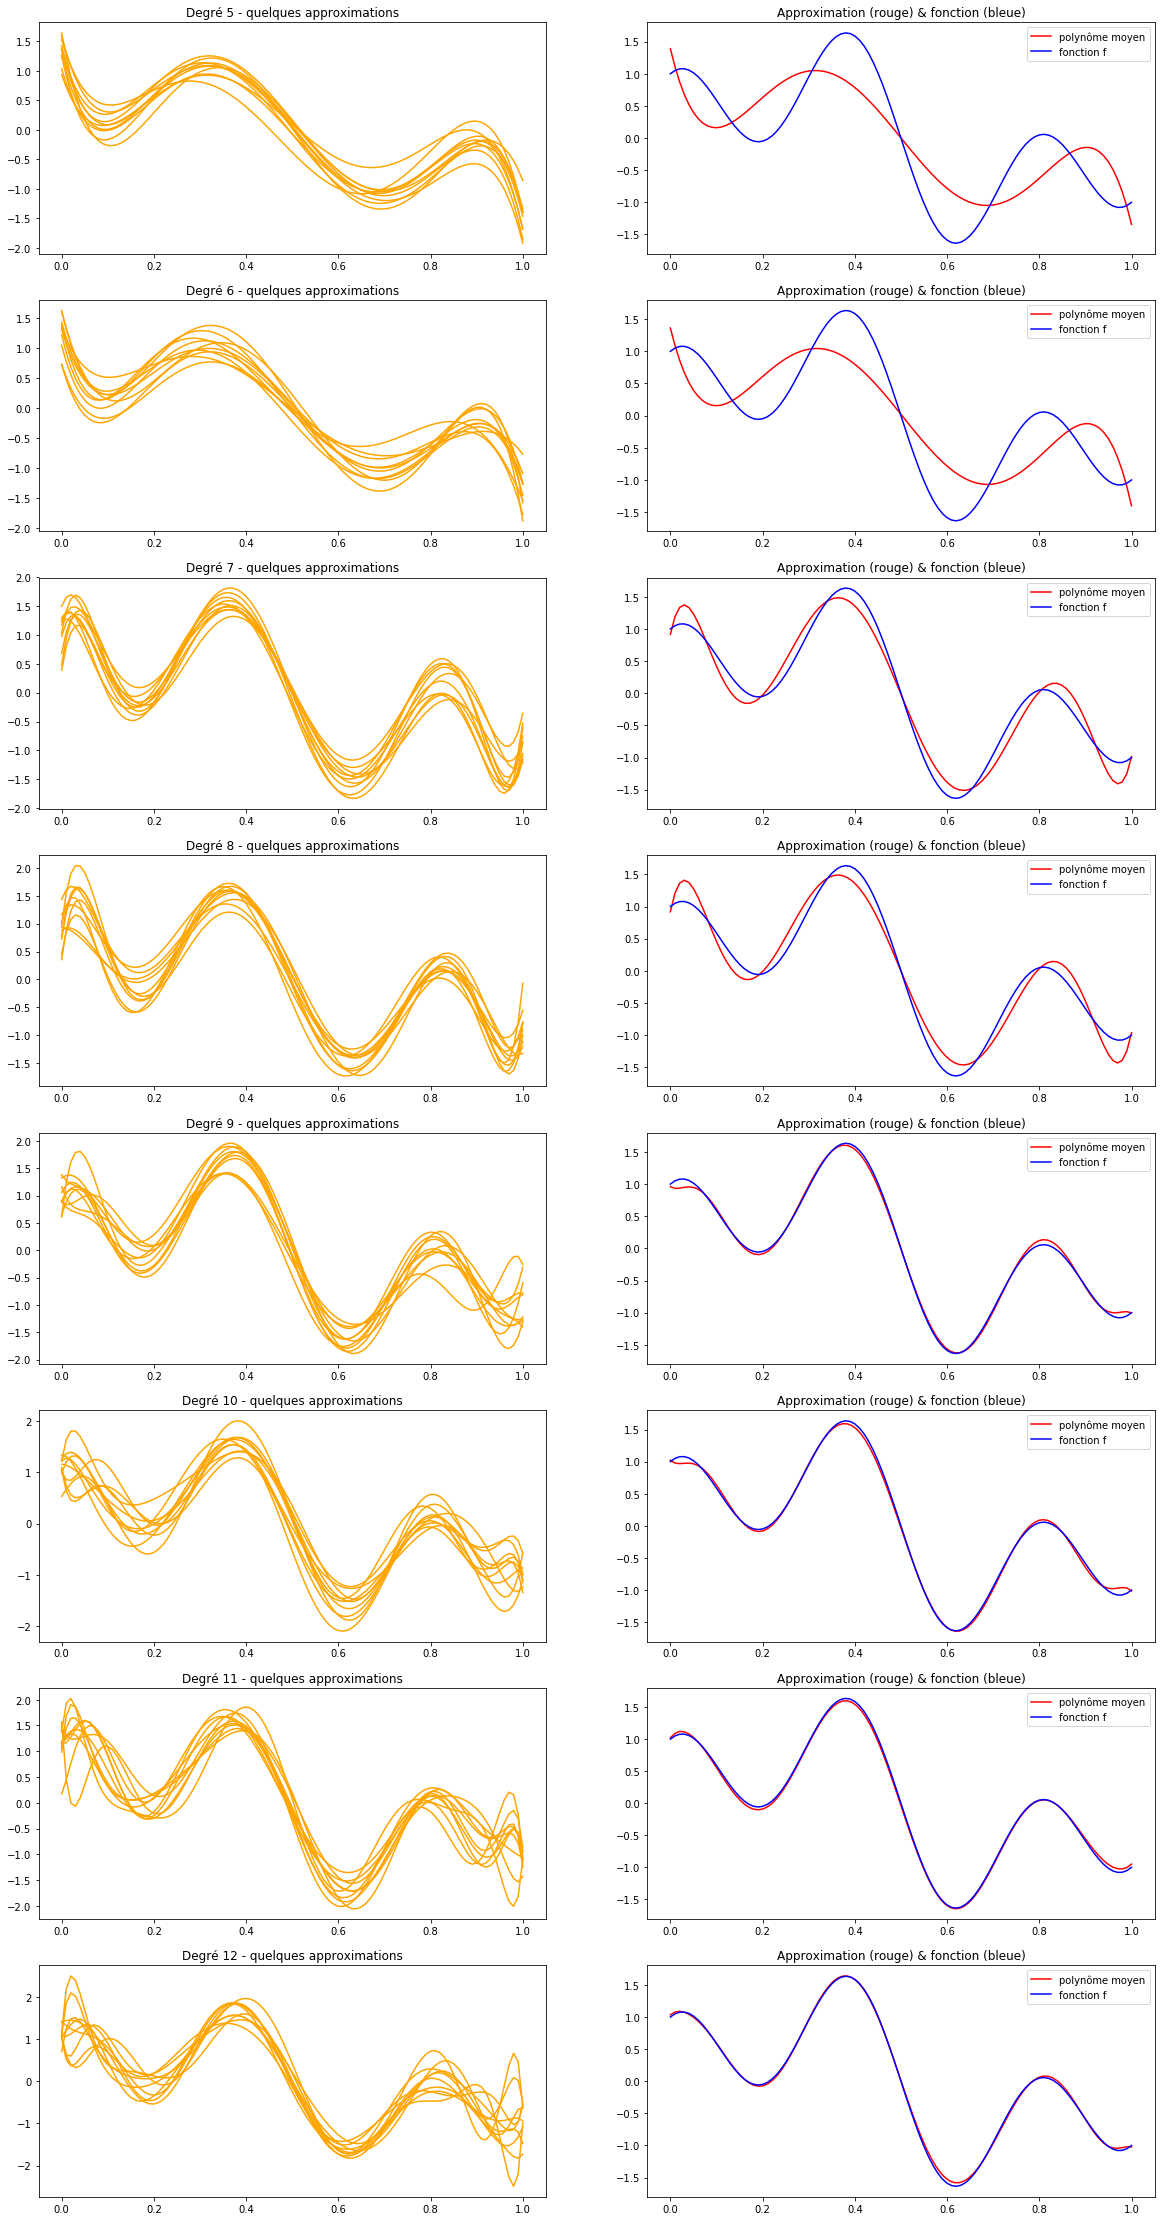

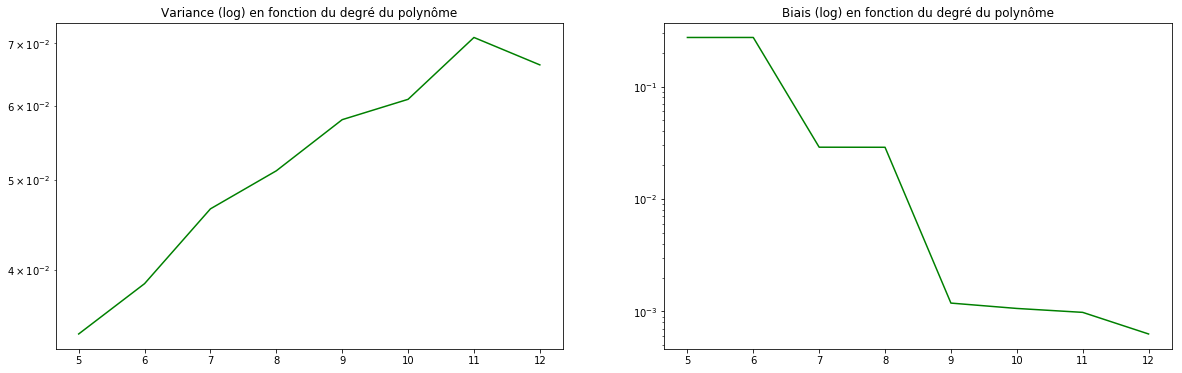

In [5]:
dmin = 5
dmax = 12
biais2 = []
variance = []
N = 100 # nombre d'échantillons
n = 20 # nombre de points par échantillon
X = np.linspace(0, 1, n)

fig, axes = plt.subplots(dmax-dmin+1, 2, figsize=(20,40))
plt.axes(axes[0,0])
    
for d in range(dmin, dmax+1):
    
    polys = genPolys(N, d, n)
    # Calcul du biais et de la variance
    fchapeau = np.polyval(sum(polys)/len(polys),X)
    biais2.append((sum((fchapeau-f(X))**2)/n))
    var = 0
    for poly in polys:
        var += sum((fchapeau-np.polyval(poly, X))**2)/n
    variance.append(var/N)
    
    # Affichage de quelques approximations
    ax = axes[int(d-dmin), 0]
    plt.axes(ax)
    ax.set_title("Degré {} - quelques approximations".format(d))
    for i in range(0, N, N//10):
        plotPoly(polys[i])
    
    # Approximation moyenne et référence
    ax = axes[int(d-dmin), 1]
    plt.axes(ax)
    ax.set_title("Approximation (rouge) & fonction (bleue)")
    plotMeanPolys(polys)
    plotFunction()
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(20,6))
axes[0].semilogy(range(dmin, dmax+1), variance, c="green")
axes[0].set_title("Variance (log) en fonction du degré du polynôme")
axes[1].semilogy(range(dmin, dmax+1), biais2, c="green")
_ = axes[1].set_title("Biais (log) en fonction du degré du polynôme")

<div class="alert alert-warning">
**Questions :**
<ul>
    <li/>Comment évoluent le biais et la variance ?
    <li/>Comment ces grandeurs sont-elles traduites sur les figures tracées auparavant ?
    <li/>Quel degré choisireriez-vous pour ce problème ?
</ul>
</div>

<div class="alert alert-success">
**Réponses :** 
<ul>
    <li/>La variance augmente et le biais diminue lorsque le degré du polynôme augmente, ce qui confirme le compromis à réaliser entre les deux.
    <li/>La variance représente la sensibilité du modèle aux données d'apprentissage : cela se traduit par la diversité des courbes dans les figures de gauche (visualisation de quelques-unes des approximations), en particulier sur les bords. Le biais, quant à lui, se traduit par l'écart entre la moyenne des estimations et la fonction réelle (écart entre les courbes bleue et rouge).
    <li/>Cela dépend de l'application et des besoins ! (mais le degré 9 semble avoir un biais correct et une variance encore acceptable malgré les extrémités)
</ul>
</div>

De façon générale, il pourrait être tentant de chercher à minimer le biais au prix de la variance, de sorte à avoir un modèle « en moyenne juste ». Cependant, en présence d'un unique échantillon et notamment s'il n'y a pas d'apprentissage ultérieur, il est préférable d'équilibrer biais et variance : *in fine*, ce qui compte est la performance sur les données que l'on a.

# Un second exemple de régression : *k-nearest neighbours*

Nous allons utiliser ici l'algorithme des *k-nearest neighbours*, toujours en régression, pour approximer la même fonction $f$ que dans l'exemple précédent.
Cet algorithme est très simple : la prédiction de la valeur de $f$ en $x$ est la moyenne des valeurs prises en les $k$ voisins les plus proches.
$$ \hat{f}(x) = \frac{1}{k}\sum_{i=1}^k f\left(N_i(x)\right) $$
avec $N_i(x)$ le $i$-ème voisin le plus proche de $x$ dans l'ensemble d'apprentissage.

Il se trouve qu'il existe une formule explicite simple de l'erreur pour *k-nearest neighbours* :
$$ Err(x) = \left(f(x)-\frac{1}{k}\sum_{i=1}^{k}f\left(N_i(x)\right)\right)^2+\frac{\sigma_\epsilon^2}{k}+\sigma_\epsilon^2 $$
où $\sigma$ est l'écart-type du bruit auquel est soumis l'ensemble d'apprentissage : $y_i = f(x_i) + \epsilon$, $\epsilon \sim \mathcal{N}(0,\sigma_\epsilon)$.

<div class="alert alert-warning">
**Question :** Comment évoluent biais et variance en fonction de $k$ d'après cette formule ?
</div>

<div class="alert alert-success">
**Réponse :** L'évolution du biais (premier terme) dépend du comportement de $f$. Si cette fonction varie « vite », prendre davantage de voisins (c'est-à-dire augmenter $k$) va rapidement dégrader l'estimation. Si elle ne varie que « lentement », le biais n'augmentera que faiblement avec $k$.
<br/>
La variance (second terme) diminue évidemment lorsque $k$ augmente.
</div>

<div class="alert alert-warning">
**Consigne :** Complétez le code ci-dessous pour tester *k-nearest neighbours* avec divers $k$ (ici de 1 à 9, de 2 en 2) et calculer la variance sur $N$ échantillons.
</div>

Variance moyenne pour k = 1 sur N = 20 essais : 0.87
Variance moyenne pour k = 3 sur N = 20 essais : 0.78
Variance moyenne pour k = 5 sur N = 20 essais : 0.75
Variance moyenne pour k = 7 sur N = 20 essais : 0.73
Variance moyenne pour k = 9 sur N = 20 essais : 0.64


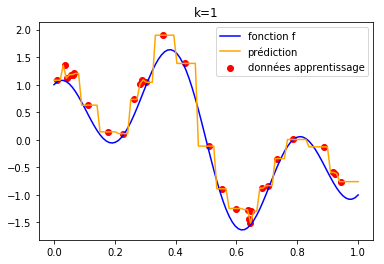

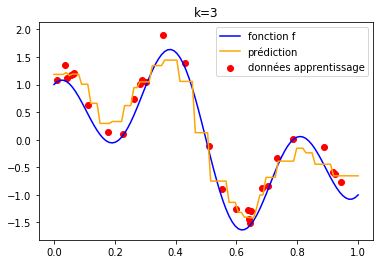

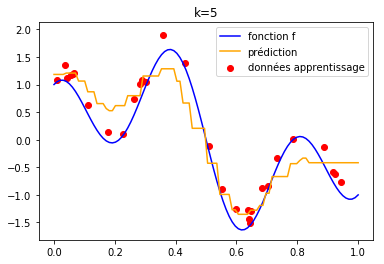

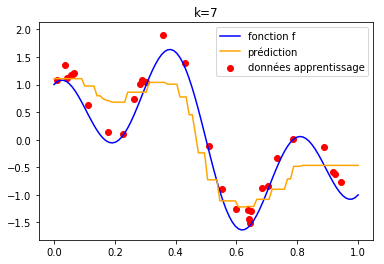

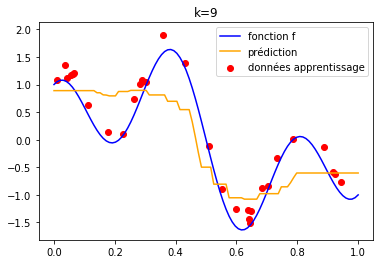

In [6]:
# Données d'apprentissage
X = np.random.rand(30)
Y = f(X)+np.random.rand(30)/3

# Xf utilisé pour f et pour la prédiction
Xf = np.linspace(0,1,100)

# Image de Xf par f
Yf = f(Xf)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
Xf = Xf.reshape(-1,1)

# Nombre d'échantillons
N = 20

kmin, kmax = 1, 10 # de 2 en 2...
Ypredict = np.empty((N, (kmax-kmin+1)//2, len(Xf)))

for i in range(N):
    for k in range(kmin, kmax, 2):
        knn = neighbors.KNeighborsRegressor(k, weights='uniform')
        Ypredict[i, k//2, :] = knn.fit(X,Y).predict(Xf)[:,0]
        
        if i==1: # on affiche un échantillon pour chaque k
            plt.figure()
            plt.plot(Xf, Yf, c='blue', label="fonction f")
            plt.plot(Xf, Ypredict[i,int(k/2),:], c='orange', label="prédiction")
            plt.scatter(X, Y, c='red', label="données apprentissage")
            plt.title("k={}".format(k))
            _=plt.legend()

for k in range(kmin, kmax, 2):
    Yvar = np.var(Ypredict[:, k//2, :], axis=1)
    
    print("Variance moyenne pour k = {} sur N = {} essais : {:0.2f}".format(k,N,np.mean(Yvar)))

<div class="alert alert-warning">
**Questions :** La variance et le biais évoluent-ils bien comme prévu ? Comment se traduit le biais sur les figures précédentes ?
</div>

<div class="alert alert-success">
**Réponses :** La variance diminue et le biais augmente quand $k$ augmente.
<br/>
Lorsque $k$ augmente, la courbe de prédiction (orange) est plus « moyenne » (d'où une plus grande insensibilité aux variations des données d'apprentissage, ce qui explique la variance), donc devient plus mauvaise : c'est le biais qui augmente.
</div>

# Exemple de classification avec *Support Vector Machines*

## Rappels

Le principe des algorithmes de SVM repose sur la recherche d'un hyperplan séparateur pour classifier un jeu de données en différentes catégories. Le meilleur hyperplan correspond à celui qui maximise la distance entre l'hyperplan et un ensemble de points, dits vecteurs supports, qui sont les plus proches de l'hyperplan. C'est également l'hyperplan qui minimise l'erreur de généralisation. 

Cependant, dans le cas de données non séparables, il est nécessaire d'introduire une marge autorisant une mauvaise classification d'un certain nombre de points. Un paramètre $C$ est alors introduit pour contrôler cette erreur de classification. Il constitue le paramètre clef dans la gestion du **compromis biais-variance** dans le cadre des algorithmes d'aprentissage supervisé SVM.


## Influence du paramètre C

On crée une fonction `generateData` qui génère aléatoirement un échantillon de données appartenant à deux catégories distinctes. Le but de cette partie est de construire un hyperplan séparateur pour ce jeu de donné et d'étudier l'influence du paramètre $C$ sur le compromis biais-variance.

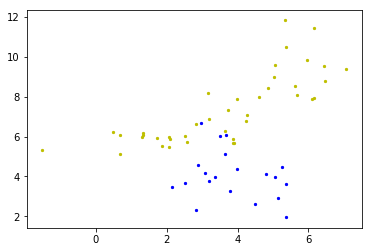

In [7]:
def generateData(n=500):
    X1, y1 = datasets.make_gaussian_quantiles(cov=2.0, n_samples=n, n_features=2, n_classes=1)
    X1[:,0] = 2. + X1[:,0]#2
    X1[:,1] = 6. + X1[:,1]/2.5#6
    X2, y2 = datasets.make_gaussian_quantiles(cov=1.5, n_samples=n, n_features=2, n_classes=1)
    X2[:,0] = 4 + X2[:,0]#7.8
    X2[:,1] = 4. + X2[:,1]#4
    X3, y3 = datasets.make_gaussian_quantiles(cov=1.5, n_samples=n, n_features=2, n_classes=1)
    X3[:,0] = 5 + X3[:,0]#5
    X3[:,1] = 9. + X3[:,1]#9
    X = np.concatenate((X1, X2, X3))
    y = np.concatenate((y1, -y2 + 1, y3))
    y = 2*y-1
    X, y = shuffle(X, y)
    return X, y

# Affichage
X, y = generateData(20)
Xyellow = X[y==-1]
Xblue = X[y==1]
plt.figure()
plt.scatter(Xyellow[:,0], Xyellow[:,1], c='y', s=5)
_=plt.scatter(Xblue[:,0], Xblue[:,1], c='b', s = 5)

<div class="alert alert-warning"> **Consigne :** Pour commencer, complétez l'algorithme calculant le meilleur hyperplan séparateur pour différents $C$, i.e. différentes tolérances d'erreur de classification ($C$ gère le compromis entre le nombre d'erreurs de classement et la largeur de la marge). On utilisera un séparateur linéaire.</div>

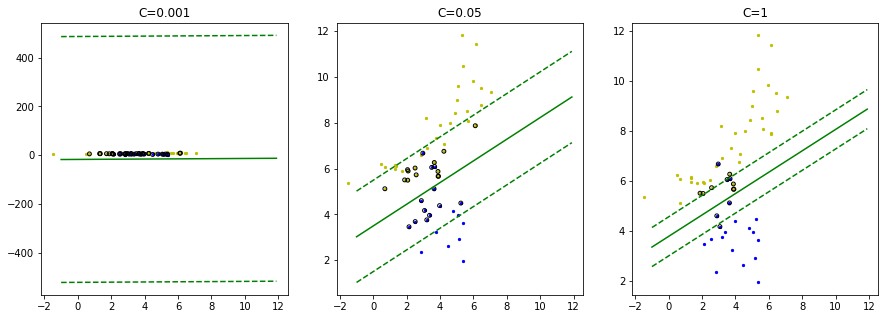

In [8]:
C_param = [0.001, 0.05, 1]

fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i, C in enumerate(C_param):
    svc = svm.SVC(kernel='linear', C=C)
    svc.fit(X, y)
    
    w = svc.coef_[0]
    w0 = svc.intercept_
    M = 1./np.linalg.norm(w)

    # On affiche le séparateur, la marge, les vecteurs support
    # Points
    ax = axes[i]
    ax.scatter(Xyellow[:,0], Xyellow[:,1], c='y', s=5)
    ax.scatter(Xblue[:,0], Xblue[:,1], c='b', s=5)
    # Séparateur avec marge
    XX = np.arange(-1., 12., 0.1)
    YY = -(w[0]*XX+w0)/w[1]
    ax.plot(XX, YY, 'g')
    YY = -(w[0]*XX+w0+M)/w[1]
    ax.plot(XX, YY, 'g--')
    YY = -(w[0]*XX+w0-M)/w[1]
    ax.plot(XX, YY, 'g--')
    # Vecteurs supports
    ax.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=15, edgecolors='k', c='')
    _=ax.set_title('C={}'.format(C_param[i]))

<div class="alert alert-warning"> **Consigne :** Maintenant, tracez l'évolution du biais et de la variance (déjà implémentées ci-dessous) avec les paramètres suivants :
<ul>
    <li>$N$ échantillons d'apprentissage, pour autant de SVC à entraîner</li>
    <li>$n\_train$ points par échantillon d'apprentissage</li>
    <li>$n\_test\times3$ points dans l'échantillon de test</li>
</ul>
Le modèle aggrégeant tous les SVC entraînés est un simple vote majoritaire.
</div>

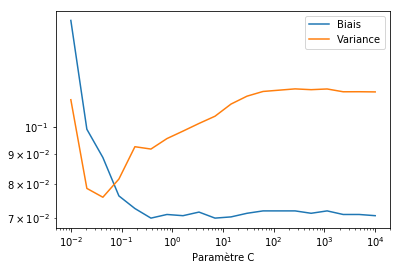

In [9]:
C_param = np.logspace(-2, 4, 20)
N = 50 # nombre de SVC
n_train = 15 # taille du tiers de l'échantillon d'apprentissage

n_test = 1000 # taille de l'échantillon de test

ypred = np.zeros((N, len(C_param), n_test*3)) # prédictions

Xtest, ytest = generateData(n_test) # test

for n in range(N):
    ### Entraînement des SVC (pour chaque C) et prédiction
    X, y = generateData(n_train)
    for i, C in enumerate(C_param):
        svc = svm.SVC(kernel='linear', C=C)
        svc.fit(X, y)
        ypred[n, i, :] = svc.predict(Xtest)

bias = np.zeros(len(C_param))
var = np.zeros(len(C_param))

# On crée la prédiction majoritaire
for i in range(len(C_param)):
    mainPrediction = np.sum(ypred[:, i, :], axis=0)
    mainPrediction[mainPrediction < N/2] = -1
    mainPrediction[mainPrediction != -1] = 1
    
    # Calcul du biais et de la variance pour la loss function binaire
    # Voir [3] (page 732) pour l'origine du calcul
    bias[i] = np.sum((mainPrediction != ytest)[:n_test*3])/(n_test*3)
    var[i] = np.sum(np.sum(np.repeat(mainPrediction, N).reshape(n_test*3, N).transpose() != ypred[:, i, :]))/n_test/N

plt.figure()
plt.xlabel("Paramètre C")
plt.loglog(C_param, bias, label="Biais")
plt.loglog(C_param, var, label="Variance")
_=plt.legend()

<div class="alert alert-warning">**Question :** Interprétez les erreurs dans les cas de $C$ extrêmes. Faites le lien avec le biais et la variance. </div>

<div class="alert alert-success">**Réponse :** Lorsque $C$ est petit, le classifieur autorise peu d'erreur de classification. L'algorithme de prédiction présente un faible biais mais généralise peu ce qui implique souvent une forte variance. Il y a un risque de sur-apprentissage des données lorsque $C$ est trop petit.
<br/>
Si $C$ est grand, on autorise plus d'erreur dans la classification des données. On colle moins au jeu de données d'apprentissage : l'algorithme présente un fort biais mais on a une meilleure généralisation des données.
</div>

Un $C$ beaucoup trop faible (comme $0.001$ tracé plus haut) mène à un SVC qui classe tous les points dans une seule classe. Cela explique les valeurs de biais « aberrantes » parfois visibles. 

# Une façon de s'affranchir du *compromis biais-variance*

La méthode de **Bagging**, et en particulier l'algorithme de **Random Forest**, permet de réduire la variance sans modifier le biais.

Pour rappel, le Bagging (*Bootstrap Aggregating*) consiste en la création de nouvelles données d'apprentissage en ré-échantillonnant l'échantillon initial. L'algorithme de Random Forest est l'usage du Bagging pour des arbres de décision complètement développés avec une sélection des *features* aléatoire.

Un arbre de décision (complètement développé) a un biais faible mais une variance très forte (du fait du détail atteint à chaque niveau de décision). En en combinant plusieurs (à la façon Random Forest), la variance diminue (la moyenne de nombreux modèles bruités donne un résultat peu bruité) sans que le biais ne change.

Le biais restant inchangé, la seule limite à la réduction de variance est le temps de calcul disponible.

Nous allons rapidement illustrer cette réduction de la variance sans changer le biais (en d'autres termes : la compensation du sur-apprentissage des arbres de décision) avec l'exemple simple du notebook sur Random Forest.

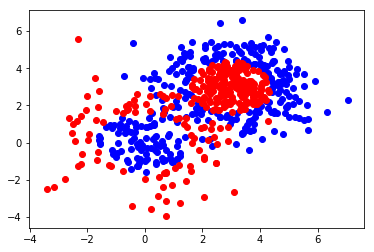

In [10]:
X1, y1 = datasets.make_gaussian_quantiles(cov=2.,
                                          n_samples=300,
                                          n_features=2,
                                          n_classes=2,
                                          random_state=1)
X2, y2 = datasets.make_gaussian_quantiles(mean=(3, 3),
                                          cov=1.5,
                                          n_samples=700,
                                          n_features=2,
                                          n_classes=2,
                                          random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))
y = 2*y-1

X, y = shuffle(X, y)

Xtest,X = np.split(X, [400])
ytest,y = np.split(y, [400])

Xblue = X[y==-1]
Xred = X[y==1]
plt.scatter(Xblue[:,0], Xblue[:,1], c='b')
_=plt.scatter(Xred[:,0], Xred[:,1], c='r')

def plot_decision_boundary(f, X, y, title=""):
    plot_step = 0.02
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, plot_step), np.arange(x1_min, x1_max, plot_step))
    yypred = f.predict(np.c_[xx0.ravel(), xx1.ravel()])
    yypred = yypred.reshape(xx0.shape)
    plt.contourf(xx0, xx1, yypred, cmap=plt.cm.Paired)
    y_pred = f.predict(X)
    Xblue_good = X[np.equal(y, -1) * np.equal(y, y_pred)]
    Xblue_bad = X[np.equal(y, -1) * np.not_equal(y, y_pred)]
    Xred_good = X[np.equal(y, 1) * np.equal(y, y_pred)]
    Xred_bad = X[np.equal(y, 1) * np.not_equal(y, y_pred)]
    plt.scatter(Xblue_good[:, 0], Xblue_good[:,1], c='b')
    plt.scatter(Xblue_bad[:, 0], Xblue_bad[:,1], c='c', marker='v')
    plt.scatter(Xred_good[:, 0], Xred_good[:,1], c='r')
    plt.scatter(Xred_bad[:, 0], Xred_bad[:,1], c='m', marker='v')
    plt.title(title)
    plt.show()

<div class="alert alert-warning"> **Consignes :** Entraînez et affichez quelques (4 par exemple) forêts avec un seul arbre. Observez la variabilité du modèle (avec *plot_decision_boundary*) entre chacune de ces tentatives.</div>

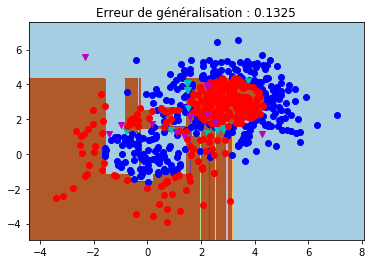

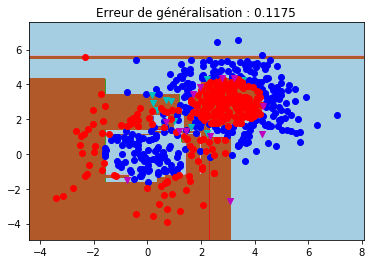

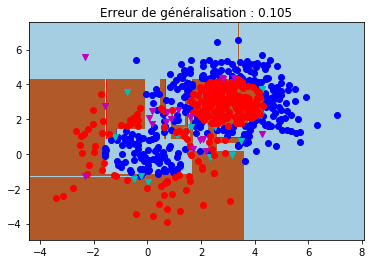

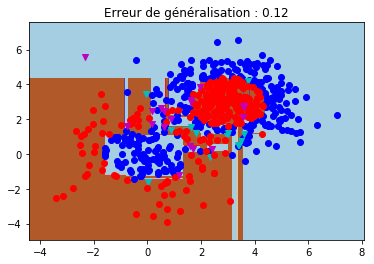

In [11]:
rf = RandomForestClassifier(n_estimators=1, criterion='entropy')
for _ in range(4):
    rf.fit(X, y)
    plot_decision_boundary(rf, X, y, "Erreur de généralisation : %g"%(1.-rf.score(Xtest,ytest)))

<div class="alert alert-warning"> **Consigne :** De façon similaire à la partie sur SVM, tracez l'évolution du biais et de la variance (déjà implémentées ci-dessous).

Le modèle aggrégeant les forêts aléatoires est un simple vote majoritaire.
</div>

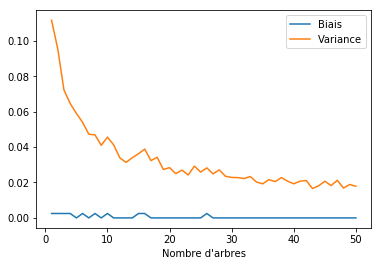

In [12]:
maxTrees = 50 # nombre maximal d'arbre par forêt
n_rf = 20 # nombre de forêts à entraîner
N = len(Xtest) # taille de l'échantillon de test

ypred = np.zeros((n_rf, maxTrees, N)) # prédictions

bias = np.zeros(maxTrees)
var = np.zeros(maxTrees)

for nbTrees in range(maxTrees):
    ### Création d'une forêt aléatoire
    rf = RandomForestClassifier(n_estimators=nbTrees+1, criterion='entropy')
    
    for n in range(n_rf):
        ### Apprentissage de la forêt aléatoire et enregistrement des prédictions pour (n, nbTrees)
        rf.fit(X, y)
        ypred[n, nbTrees, :] = rf.predict(Xtest)

for i in range(maxTrees):
    mainPrediction = np.sum(ypred[:, i, :], axis=0)
    mainPrediction[mainPrediction < n_rf/2] = -1
    mainPrediction[mainPrediction != -1] = 1
    
    # Calcul du biais et de la variance pour la loss function binaire
    # Voir [3] (page 732) pour l'origine du calcul
    bias[i] = np.sum((mainPrediction != ytest)[:n_rf])/N
    var[i] = np.sum(np.sum(np.repeat(mainPrediction, n_rf).reshape(N, n_rf).transpose() != ypred[:, i, :]))/N/n_rf

plt.figure()
plt.xlabel("Nombre d'arbres")
plt.plot(range(1, maxTrees+1), bias, label="Biais")
plt.plot(range(1, maxTrees+1), var, label="Variance")
_=plt.legend()

# Bibliographie

[1] __Understanding the Bias-Variance Tradeoff__ - Scott Fortmann Roe - June 2012 - 
http://scott.fortmann-roe.com/docs/BiasVariance.html

[2] __The Elements of Statistical Learning__ - _Data Mining, Inference and Prediction ; 2nd Edition_ - Trevor Hastie, Robert Tibshirani, Jerome Friedman - https://web.stanford.edu/~hastie/Papers/ESLII.pdf

[3] __Bias-variance analysis of support vector machines for the development of SVM-based ensemble methods__ - _Journal of Machine Learning Research_ (725-775) - Valentini, G., & Dietterich, T. G. - 5 July 2004 - http://www.jmlr.org/papers/volume5/valentini04a/valentini04a.pdf

### Auteurs de ce notebook

Thibaud Durivaux & Aymeline Martin